In [1]:
from UDR.udr import train_test_ppo_with_udr
from PPO.ppo_test import train_and_test_policy

n_episodes = 5000
mean_timestep = 300
target_env = "CustomHopper-target-v0"
source_env = "CustomHopper-source-v0"
base_output_folder = "./udr_output"

print("*** PPO without UDR ***")
train_and_test_policy(
    train_env=source_env,
    test_env=target_env,
    output_folder=f"./{base_output_folder}/no-udr/",
    clip_range=-1,
    episodes=n_episodes,
    timesteps=mean_timestep,
    print_std_deviation=True
)

deltas = [0.2, 0.4, 0.6, 0.8]
for delta in deltas:
    print(f"\n*** PPO with UDR delta: {delta}")
    output_folder = f"{base_output_folder}/{delta}"

    train_test_ppo_with_udr(
		output_folder=output_folder,
		train_env=source_env,
		test_env=target_env,
		episodes=n_episodes,
		clip_range=-1,
		timesteps=mean_timestep,
		delta=delta,
		print_std_deviation=True
	)

*** PPO without UDR ***


/opt/miniconda3/envs/mldl_m4/lib/python3.8/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean episode length
306.9271983640082
mean train reward
1075.6111586972106
mean test reward
751.4368807577957
test rewards file: ././udr_output/no-udr//test_rewards_CustomHopper-target-v0.txt
mean test std
53.810112104667056

*** PPO with UDR delta: 0.2
mean episode length
284.4316846693197
mean train reward
947.6766431443981
mean test reward
783.2529907991903
test rewards file: ./udr_output/0.2/test_rewards_CustomHopper-target-v0.txt
mean test std
53.582757225540306

*** PPO with UDR delta: 0.4
mean episode length
308.98806093042407
mean train reward
1054.5883101799275
mean test reward
893.0801158153602
test rewards file: ./udr_output/0.4/test_rewards_CustomHopper-target-v0.txt
mean test std
63.33142811513549

*** PPO with UDR delta: 0.6
mean episode length
311.155679933665
mean train reward
1033.1034510779757
mean test reward
1024.2818020057946
test rewards file: ./udr_output/0.6/test_rewards_CustomHopper-target-v0.txt
mean test std
68.37033776762931

*** PPO with UDR delta: 0.8
mean

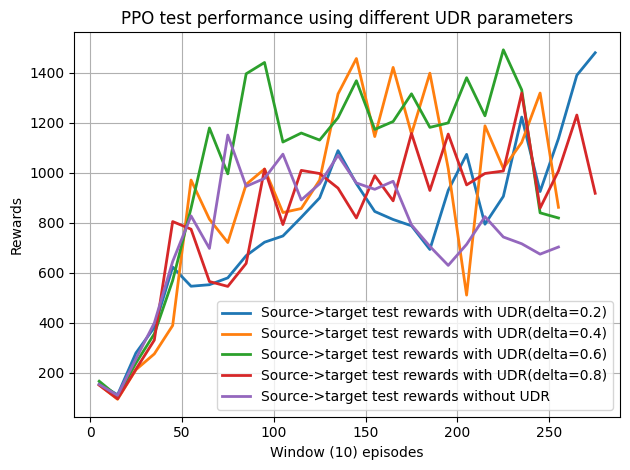

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def get_rewards (filename, window_size: int = 10):
    with open(filename, 'r') as f:
        lines = f.readlines()
        data = [float(line.strip()) for line in lines]

        means = []
        positions = []
        for i in range(0, len(data), window_size):
            window = data[i:i+window_size]
            mean_value = np.mean(window)
            means.append(mean_value)
            positions.append(i + window_size//2)
        
        return means, positions
    
path_test_resources = './udr_output'

for delta in deltas:
    r, p = get_rewards(f"{path_test_resources}/{delta}/test_rewards_CustomHopper-target-v0.txt")
    plt.plot(p, r, label=f'Source->target test rewards with UDR(delta={delta})', linewidth=2)


s_t_test_rewards, st_positions = get_rewards(f'{path_test_resources}/no-udr/test_rewards_CustomHopper-target-v0.txt')
plt.plot(st_positions, s_t_test_rewards, label=f'Source->target test rewards without UDR', linewidth=2)

plt.ylabel("Rewards")
plt.xlabel(f"Window ({10}) episodes")
plt.title("PPO test performance using different UDR parameters")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()